# Plotting Arrays Using matplotlib

### For inline plotting, rather than new windows:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import math
import matplotlib.pyplot as pl # import this for plotting routines

In [33]:
# Get a listing of all files in the current working directory
import os
os.listdir()

['hatp36b_plot.ipynb', 'Measurements.xls', '.ipynb_checkpoints']

In [7]:
# Get the HAT-P 36b filename into a string variable
import glob
hatFile=glob.glob('*.xls')
hatFile[0]

'Measurements.xls'

In [9]:
# Read in the HAT-P 36b data
# NOTE: You will have to change the "usecols" settings! 
# You want the columns with headings: "J.D.-2400000", "rel_flux_T1", "rel_flux_err_T1"
hatData = np.loadtxt(hatFile[0],skiprows=1,delimiter='\t',usecols=[4,15,22])
hatData

array([[5.85836013e+04, 6.52720000e-02, 2.72000000e-04],
       [5.85836014e+04, 6.38730000e-02, 2.67000000e-04],
       [5.85836016e+04, 6.44130000e-02, 2.70000000e-04],
       [5.85836017e+04, 6.42090000e-02, 2.68000000e-04],
       [5.85836018e+04, 6.42610000e-02, 2.68000000e-04],
       [5.85836020e+04, 6.44900000e-02, 2.69000000e-04],
       [5.85836021e+04, 6.52820000e-02, 2.69000000e-04],
       [5.85836022e+04, 6.61170000e-02, 2.73000000e-04],
       [5.85836024e+04, 6.44080000e-02, 2.68000000e-04],
       [5.85836025e+04, 6.50930000e-02, 2.70000000e-04],
       [5.85836026e+04, 6.51860000e-02, 2.71000000e-04],
       [5.85836028e+04, 6.45690000e-02, 2.70000000e-04],
       [5.85836029e+04, 6.56520000e-02, 2.71000000e-04],
       [5.85836031e+04, 6.55990000e-02, 2.70000000e-04],
       [5.85836032e+04, 6.45250000e-02, 2.68000000e-04],
       [5.85836033e+04, 6.46120000e-02, 2.68000000e-04],
       [5.85836035e+04, 6.47790000e-02, 2.71000000e-04],
       [5.85836036e+04, 6.48520

In [17]:
# Interpret the data for plotting
hatDmd=58583.5683565 # midpoint of transit in "JD-2400000" form
hatDx =24*(hatData[:,0]-hatDmd) # times relative to mid-transit, in hours
hatFy =hatData[:,1] # Relative fluxes for target star
hatFyu=hatData[:,2] # uncertainties

In [32]:
# Smoothed lightcurve for overplotting
box_pts=11 # number of data points to average for smoothing
box = np.ones(box_pts)/box_pts
hatFys = np.convolve(hatFy, box, mode='same')
nb2=int((box_pts-1)/2)

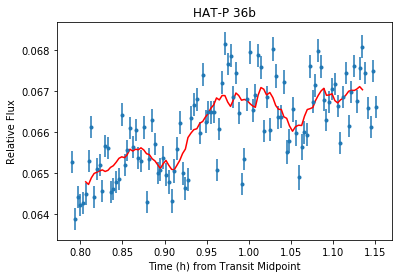

In [31]:
# Make a plot!
pl.errorbar(hatDx,hatFy,hatFyu,marker='.',ls='')
pl.plot(hatDx[nb2:-nb2],hatFys[nb2:-nb2],color='r')
pl.xlabel('Time (h) from Transit Midpoint')
pl.ylabel('Relative Flux')
pl.title('HAT-P 36b')
pl.show()